## PROCESSAMENTO DE DADOS COM NUMPY, PANDAS E SKLEARN

In [162]:
import numpy as np
import pandas as pd
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Remoção de Outliers

In [163]:
notas = rd.sample(range(400, 800), 95)
notas+=[20, 1322, 1534, 1421]
print(notas)

[580, 574, 733, 724, 448, 662, 788, 736, 436, 560, 536, 756, 406, 715, 524, 600, 757, 713, 596, 779, 676, 500, 732, 592, 446, 559, 431, 508, 575, 455, 462, 516, 533, 793, 430, 498, 401, 610, 460, 781, 750, 503, 400, 485, 402, 712, 790, 648, 718, 670, 673, 635, 638, 573, 625, 737, 442, 728, 668, 531, 726, 770, 512, 562, 458, 725, 705, 649, 681, 479, 441, 598, 731, 663, 696, 754, 641, 706, 407, 685, 619, 682, 507, 656, 582, 545, 780, 777, 555, 639, 661, 608, 551, 464, 752, 20, 1322, 1534, 1421]


<AxesSubplot:>

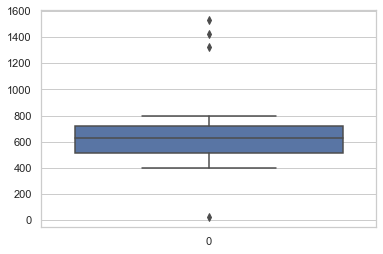

In [164]:
sns.boxplot(data=notas)

* Média e Mediana:

In [165]:
print("Média Aritmética:",round(np.mean(notas),3))
print("Mediana:",np.median(notas))

Média Aritmética: 628.01
Mediana: 625.0


* Desvio Padrão:

In [166]:
print("Desvio Padrão:",round(np.std(notas),3))

Desvio Padrão: 191.018


In [167]:
mean = np.mean(notas)
std = np.std(notas)

#### Encontrando e removendo os outliers

* Fronteira abaixo de valor $ mean - (2 x std) $

In [168]:
mean - (2*std)

245.9750933646945

In [169]:
list = []
for i in notas:
    if (i < mean - 2 * std):
        list += [i]
print(list)

[20]


* Fronteira acima de valor $ mean + (2 x std) $

In [170]:
mean + (2*std)

1010.0451086555076

In [171]:
list = []
for i in notas:
    if (i > mean + 2 * std):
        list += [i]
print(list)

[1322, 1534, 1421]


* Remoção dos valores encontrados acima e abaixo das fronteiras

In [176]:
notas_att = [i for i in notas if (i < mean + 2 * std)]
notas_att = [i for i in notas_att if (i > mean - 2 * std)]
print(notas_att)

[580, 574, 733, 724, 448, 662, 788, 736, 436, 560, 536, 756, 406, 715, 524, 600, 757, 713, 596, 779, 676, 500, 732, 592, 446, 559, 431, 508, 575, 455, 462, 516, 533, 793, 430, 498, 401, 610, 460, 781, 750, 503, 400, 485, 402, 712, 790, 648, 718, 670, 673, 635, 638, 573, 625, 737, 442, 728, 668, 531, 726, 770, 512, 562, 458, 725, 705, 649, 681, 479, 441, 598, 731, 663, 696, 754, 641, 706, 407, 685, 619, 682, 507, 656, 582, 545, 780, 777, 555, 639, 661, 608, 551, 464, 752]


* Criando um gráfico que apresenta um dataset sem outliers presentes:

<AxesSubplot:>

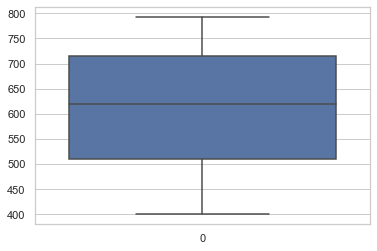

In [177]:
sns.boxplot(data=notas_att)

### Discretização de dados 

* Vamos considerar uma lista de valores onde eles indicam a qualidade de um produto de 0 a 10, sendo 0 indicativo de péssima qualidade.

In [20]:
quality = [rd.randrange(0, 11) for i in range(20)]
quality = sorted(quality)
print(quality)

[0, 0, 0, 1, 1, 2, 4, 4, 4, 5, 6, 7, 7, 7, 8, 8, 9, 10, 10, 10]


* Utilizamos a função "qcut" do pandas para realizar a discretização dos dados, separando em 3 categorias: Ruim, Regular e Bom.

In [21]:
quality_data = quality.copy()
quality_data = pd.qcut(quality_data, 3, labels=["Ruim", "Regular", "Bom"])

In [22]:
quality_data.value_counts()

Ruim       9
Regular    5
Bom        6
dtype: int64

In [23]:
for i in range(len(quality)):
    print(quality[i], ":", quality_data[i])

0 : Ruim
0 : Ruim
0 : Ruim
1 : Ruim
1 : Ruim
2 : Ruim
4 : Ruim
4 : Ruim
4 : Ruim
5 : Regular
6 : Regular
7 : Regular
7 : Regular
7 : Regular
8 : Bom
8 : Bom
9 : Bom
10 : Bom
10 : Bom
10 : Bom


* Verificando a discretização de dados em um dataset real:

In [26]:
df_wine = pd.read_csv("data/wine_dataset.csv")

In [27]:
df_wine["quality"].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='Count'>

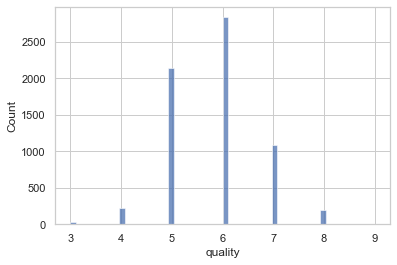

In [28]:
sns.histplot(df_wine["quality"])

In [29]:
df_wine_att = df_wine.copy()
df_wine_att["quality"] = pd.cut(df_wine_att["quality"], 3, labels=["Ruim", "Regular", "Bom"])

In [30]:
df_wine_att["quality"].value_counts()

Regular    3915
Ruim       2384
Bom         198
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='Count'>

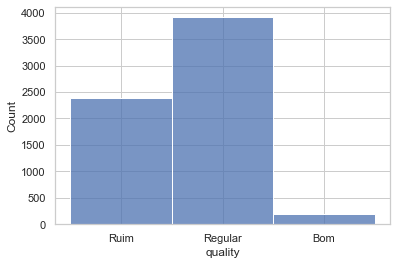

In [31]:
sns.histplot(df_wine_att["quality"])

### Normalização dos dados
Normalização é muito importante para alterar dados que possuem valores muito distantes entre eles.

* Nesses dados verificamos uma variância muito grande entre o menor valor e o maior:

In [77]:
data = np.array([[-1, 2],
                 [0.5,6],
                 [0, 10],
                 [1, 18]])
print(data)

[[-1.   2. ]
 [ 0.5  6. ]
 [ 0.  10. ]
 [ 1.  18. ]]


In [78]:
print(data.mean())

4.5625


* Visualizando a distribuição do array:

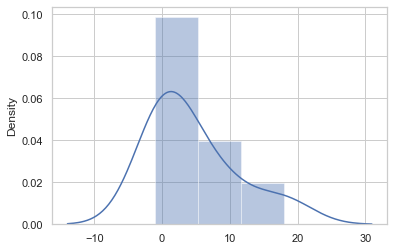

In [80]:
sns.distplot(data.reshape(-1))
plt.show()

* Normalizando os dados

In [81]:
normalizer = Normalizer().fit(data)

data_normalized = normalizer.transform(data)
print(data_normalized)

[[-0.4472136   0.89442719]
 [ 0.08304548  0.99654576]
 [ 0.          1.        ]
 [ 0.05547002  0.99846035]]


In [82]:
print("Média dos dados normalizados:",round(data_normalized.mean(),4))

Média dos dados normalizados: 0.4476


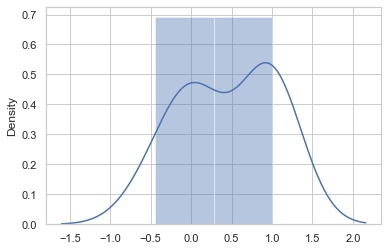

In [84]:
sns.distplot(data_normalized.reshape(-1))
plt.show()

### Estandartização dos dados

In [131]:
data = np.random.normal(size=50)
print(data)

[ 0.63895321  0.96100303 -0.2245811   0.45224692 -0.44101774  1.53184799
 -0.31455479  0.65417782 -1.21957824 -0.81148952  0.48814219 -0.62700802
 -0.77670459  1.68256863  2.4488142   1.63467353 -0.69606801 -0.09096229
  2.05848082  0.65589856 -1.95899169 -0.14581874 -0.05645563  1.86329756
 -0.02213928 -0.25381423 -0.1491941  -0.27190708  0.09514477  0.08753043
 -0.57147642 -0.45992517 -1.06742753 -1.46138227 -0.48799396 -0.50587167
  1.44577641  2.0030755  -1.33853614  0.08024762 -1.01233533  0.43561466
 -0.41829118 -1.19715528  1.00880995  0.68501119 -0.59873861  1.0703739
 -0.78214262  0.44605426]


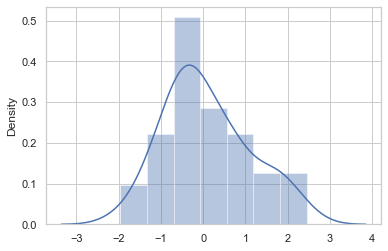

In [132]:
sns.distplot(data.reshape(-1))
plt.show()

* Realizando a estandartização dos dados:

In [133]:
data = data.reshape(-1, 1)
scaler = MinMaxScaler().fit(data.reshape(-1, 1))

data_scaled = scaler.transform(data)
print(data_scaled.reshape(1,-1))

[[0.58939639 0.66245992 0.39348615 0.54703829 0.34438312 0.79196765
  0.3730738  0.59285041 0.16775091 0.2603341  0.55518186 0.30218746
  0.26822576 0.82616168 1.         0.81529571 0.2865198  0.42380029
  0.91144497 0.59324079 0.         0.41135499 0.43162882 0.8671637
  0.43941418 0.38685403 0.41058922 0.3827493  0.46602244 0.46429497
  0.31478593 0.34009359 0.20226938 0.11289277 0.33372562 0.32966969
  0.77244057 0.89887515 0.1407629  0.46264272 0.21476816 0.54326493
  0.3495391  0.17283801 0.67330588 0.59984558 0.30860095 0.68727291
  0.26699204 0.54563336]]


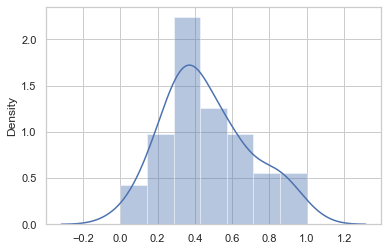

In [134]:
sns.distplot(data_scaled)
plt.show()

* Ela não altera a faixa de distribuição, somente os valores.